### 作业一：福大教务处情报分析任务（Pandas）

将上一轮作业的作业 1 爬取到的数据进行分析与可视化。

#### 要求

1. 请使用 **Jupyter Notebook** 的形式完成你的代码与分析报告，这能让你的分析过程一目了然。
2. **「通知人」都有谁？** 统计所有出现过的「通知人」，并计算他们各自发布的通知数量占总数的比例。
3. **附件下载次数与通知人的关系？** 分析附件的下载次数与通知人是否存在某种联系。比如，是不是某些特定部门发布的通知，附件下载量总是特别高？
4. **通知发布的高峰期？** 统计每天发布的通知数量，分析一下，通常在学期的哪个时间段，通知会变得特别密集？
5. **自由探索** 根据你对数据的好奇心，自行思考一个你感兴趣的问题，并进行数据分析。（例如：通知的标题长度和阅读量 / 下载量有关吗？标题中出现哪些关键词会更受关注？）
6. **图表可视化** 尝试使用 `matplotlib` 或其他可视化工具，将你在问题 **3** 和 **4** 中的分析结果以图表的形式呈现出来。

#### 任务 1
+ **「通知人」都有谁？** 统计所有出现过的「通知人」，并计算他们各自发布的通知数量占总数的比例。

In [ ]:
import re
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ROOT_DIR = os.getcwd()
pd.options.display.unicode.east_asian_width = True

df = pd.read_csv(ROOT_DIR+"\\data.csv")
df.columns = ['notifier','title','date','url','attachments','downloads']
notifier_counts = df['notifier'].value_counts()
notifier_counts.index.name = None
notifier_percent = notifier_counts.map(lambda num : f"{(num * 100 / df.shape[0]):.2f}%")

result_notifier = pd.concat([notifier_counts,notifier_percent],axis=1)
result_notifier.columns = ['通知数','百分比']
result_notifier = result_notifier.transpose()

result_notifier

,教学运行,实践科,质量办,综合科,计划科,教研教改,教学通知,教材中心,电教中心
通知数,791,558,204,133,128,111,61,33,1
百分比,39.16%,27.62%,10.10%,6.58%,6.34%,5.50%,3.02%,1.63%,0.05%


#### 任务 2
+ **附件下载次数与通知人的关系？** 分析附件的下载次数与通知人是否存在某种联系。比如，是不是某些特定部门发布的通知，附件下载量总是特别高？

In [ ]:
#因为之前数据输出格式的问题，这里做了一下转化
df['downloads'] = df['downloads'].map(lambda total : sum([int(num) for num in total.split(',')]) )

average_downloads = (df.groupby('notifier')['downloads'].sum() / df.groupby('notifier')['attachments'].sum())
average_downloads.index.name = None
average_downloads = average_downloads.fillna(0.00)
average_downloads = average_downloads.map(lambda num : round(num, 1))

attachment_notices = df.groupby('notifier')['attachments'].apply(lambda num : num.map(lambda x : int(x != 0)).sum())

result_downloads = pd.concat([attachment_notices,average_downloads],axis=1)
result_downloads.columns = ['含附件的通知数', '附件平均下载数']
result_downloads.sort_values(by='附件平均下载数',ascending=False,inplace=True)
result_downloads = result_downloads.transpose()

result_downloads

,计划科,实践科,教研教改,教学运行,质量办,综合科,教材中心,教学通知,电教中心
含附件的通知数,22.0,195.0,28.0,154.0,53.0,14.0,22.0,14.0,0.0
附件平均下载数,2091.7,1947.3,1473.8,1194.7,1025.9,834.0,813.6,689.8,0.0


+ **分析** 可以看到，尽管 计划科 的含附件的通知较少，但是计划科的附件平均下载数是最高的。实践科包含附件的通知则是最多的。

#### 任务 3
+ **通知发布的高峰期？** 统计每天发布的通知数量，分析一下，通常在学期的哪个时间段，通知会变得特别密集？

In [71]:
#学期初9、3 学期中10-12、4-5 学期末1、6 假期2、7-8
df['date'] = pd.to_datetime(df['date'])
date_frame = pd.DataFrame(columns=['year','month','day'])

date_frame['year'] = df['date'].apply(lambda date : date.year)
date_frame['month'] = df['date'].apply(lambda date: date.month)
date_frame['day'] = df['date'].apply(lambda date : date.day)

ini = ((date_frame['month'] == 9) | (date_frame['month'] == 3)).value_counts()[True]
mid = (((date_frame['month'] >= 10) & (date_frame['month'] <= 12)) | ((date_frame['month'] >= 4) & (date_frame['month'] <= 5))).value_counts()[True]
fin = ((date_frame['month'] == 1) | (date_frame['month'] == 6)).value_counts()[True]
hol = ((date_frame['month'] == 2) | ((date_frame['month'] >= 7) & (date_frame['month'] <= 8))).value_counts()[True]

result_date = pd.DataFrame(columns=['学期初','学期中','学期末','假期'])
result_date['学期初'] = [ini, f"{ini * 100 / df.shape[0]:.1f}%", round(ini / 2, 2)]
result_date['学期中'] = [mid, f"{mid * 100 / df.shape[0]:.1f}%", round(mid / 5, 2)]
result_date['学期末'] = [fin, f"{fin * 100 / df.shape[0]:.1f}%", round(fin / 2, 2)]
result_date['假期'] = [hol, f"{hol * 100 / df.shape[0]:.1f}%", round(hol / 3, 2)]
result_date.index = ['通知数','百分比','月平均']

result_date

,学期初,学期中,学期末,假期
通知数,452,957,363,248
百分比,22.4%,47.4%,18.0%,12.3%
月平均,226.0,191.4,181.5,82.67


+ **分析** 可以看到，学期中的通知数是最多的，但是如果取每月平均值的话，就可以发现学期初的通知频率最高。

#### 任务 4
+ **自由探索** 根据你对数据的好奇心，自行思考一个你感兴趣的问题，并进行数据分析。（例如：通知的标题长度和阅读量 / 下载量有关吗？标题中出现哪些关键词会更受关注？）

+ FZU会在一些节假日发布一些关于放假课程调整的通知，来统计一下这些通知占总通知数的比例。
+ FZU通知页面的网址分两种，一种又臭又长，另一种则十分简洁优雅，来统计一下优雅网址的比例。

In [ ]:
holiday_notices = df['title'].apply(lambda title : "放假" in title).value_counts()[True]
nice_url = df['url'].apply(lambda url : ".htm" in url).value_counts()[True]

data = {"放假通知": [f"{holiday_notices * 100 / df.shape[0]:.1f}%"],
          "优雅网址": [f"{nice_url * 100 / df.shape[0]:.1f}%"]}

result_free = pd.DataFrame(data=data,index=['百分比'])

result_free

,放假通知,优雅网址
百分比,2.5%,97.0%


+ **分析** 可以看到，放假通知的比例是相当少的。（这是理所当然的，但我想要更多的节假日。。。）
+ **分析** 优雅网址的占比还是挺高的，但那剩下的 3% 让有强迫症的我非常不爽。

#### 任务 5
+ **图表可视化** 尝试使用 `matplotlib` 或其他可视化工具，将你在问题 **3** 和 **4** 中的分析结果以图表的形式呈现出来。

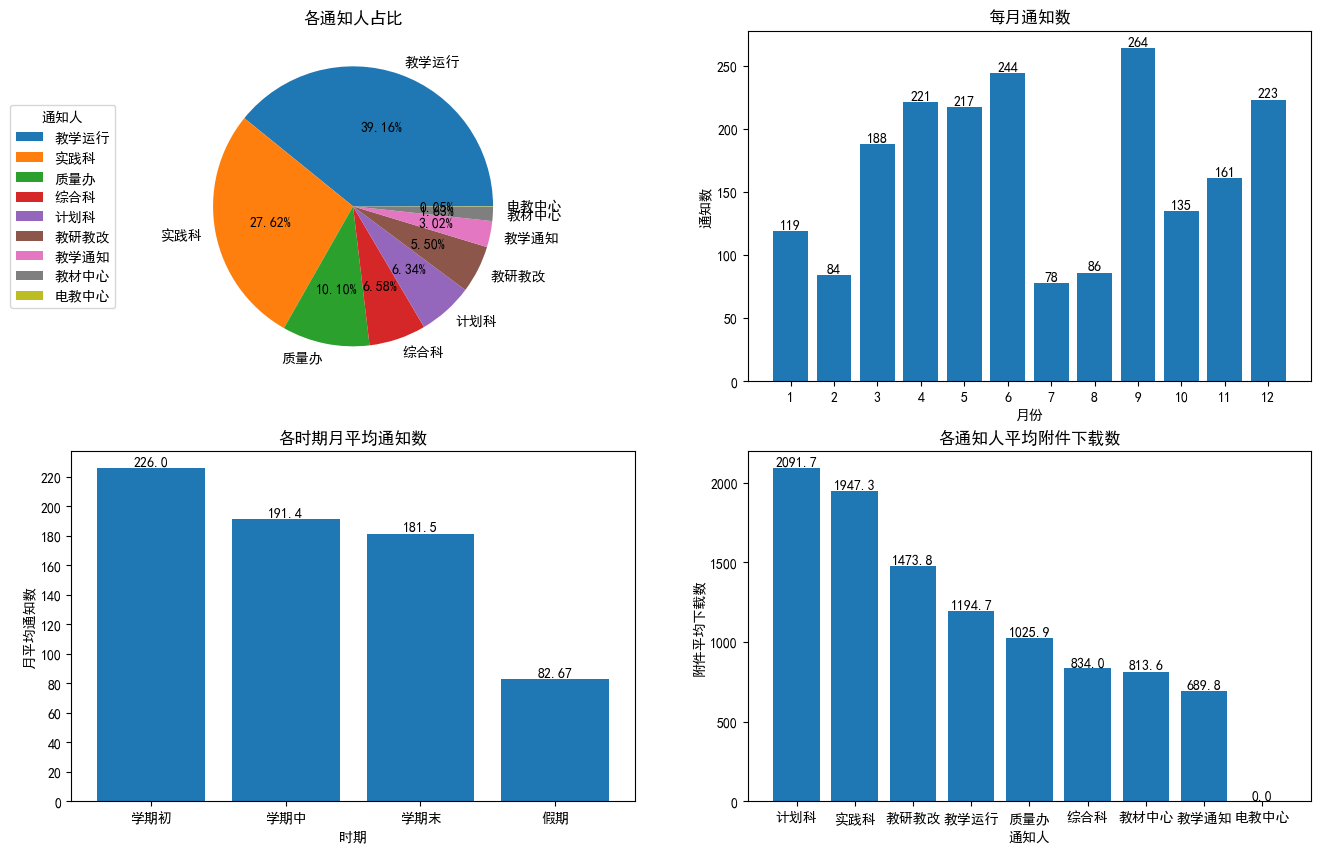

In [ ]:
plt.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(16, 10))

#图表一
plt.subplot(2,2,1)
plt.title('各通知人占比')
plt.pie(result_notifier.loc['通知数'],labels=result_notifier.columns,autopct='%.2f%%')
plt.legend(title="通知人", loc="center left", bbox_to_anchor=(-0.5, 0.5))

#图表二
plt.subplot(2,2,2)
plt.title('每月通知数')
month_notices = date_frame['month'].value_counts().sort_index()
x = np.array(month_notices.index)
y = np.array(month_notices)
plt.bar(x,y)
plt.xticks(x)
plt.ylabel('通知数')
plt.xlabel('月份')
for x0, y0 in zip(x, y):
    plt.text(x0, y0, y0, ha='center', va='bottom', fontsize=10)

#图表三
plt.subplot(2,2,3)
plt.title('各时期月平均通知数')
x = np.array(result_date.columns)
y = np.array(result_date.loc['月平均'])
plt.yticks(range(0,300,20))
plt.ylabel('月平均通知数')
plt.xlabel('时期')
plt.bar(x, y)
for x0, y0 in zip(x, y):
    plt.text(x0, y0, y0, ha='center', va='bottom', fontsize=10)

#图表四
plt.subplot(2,2,4)
plt.title('各通知人平均附件下载数')
x = np.array(result_downloads.columns)
y = np.array(result_downloads.loc['附件平均下载数'])
plt.yticks(range(0,3000,500))
plt.ylabel('附件平均下载数')
plt.xlabel('通知人')
plt.bar(x, y)
for x0, y0 in zip(x, y):
    plt.text(x0, y0, y0, ha='center', va='bottom', fontsize=10)

plt.show()